<a href="https://colab.research.google.com/github/Shreedevi-Byahatti/Class-84/blob/main/Rain_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Collection

In [ ]:
import pandas as pd
file_id = '1ha6-YJq02MBaSPgTSPg3kTqXNI0TYzqi'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)

### Data Processing

Data Information

In [ ]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [ ]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [ ]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [ ]:
data.duplicated().sum()

0

Data Cleaning

In [ ]:
# Dropping null values from the DataFrame
data.dropna(inplace=True)

In [ ]:
# Check the count of null values after removing rows
data.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

Data Formatting

In [ ]:
# Changing columns to necessary data types
data = data.astype({'DATE': 'datetime64[ns]', 'RAIN': 'int16'})

In [ ]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


### Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Monthly Rainfall

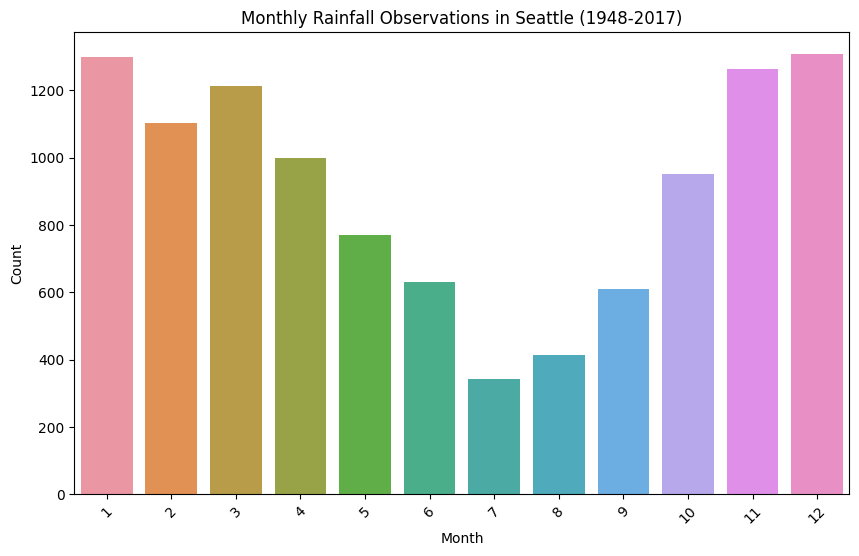

In [ ]:
# Extract the month from the 'DATE' column and create a new 'MONTH' column
data['MONTH'] = data['DATE'].dt.month

# Create a pivot table
rainfall_pivot = data.pivot_table(index=['RAIN'], columns='MONTH', aggfunc='size', fill_value=0)

# Select the row where 'RAIN' is 1 (True)
rainy_month_counts = rainfall_pivot.loc[1]

# Extract the keys (months) and values (counts)
months = rainy_month_counts.index
counts = rainy_month_counts.values

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=counts)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Rainfall Observations in Seattle (1948-2017)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Monthly Percipitation

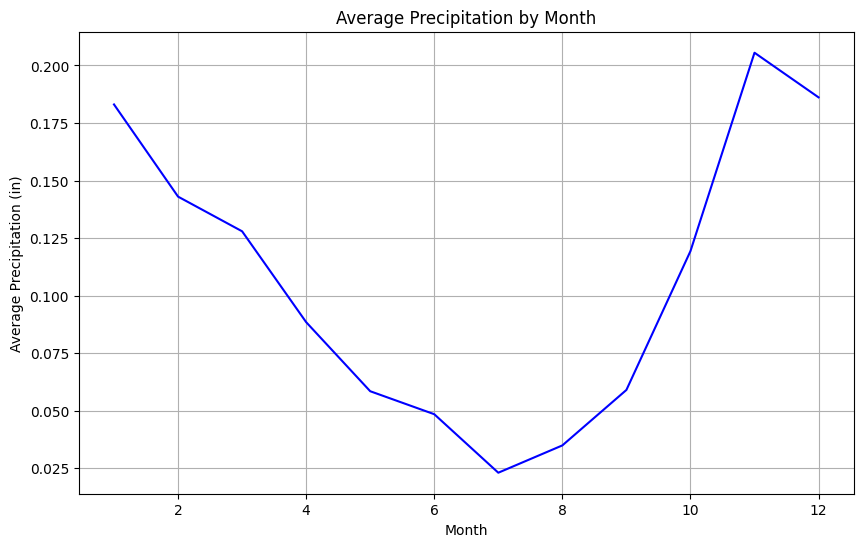

In [ ]:
# Calculate the average precipitation by month
averageByMonth = data.groupby('MONTH')['PRCP'].mean().reset_index()

# Create a line plot using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=averageByMonth, x='MONTH', y='PRCP', linewidth=1.5, color='blue')
plt.title('Average Precipitation by Month')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (in)')
plt.grid(True)
plt.show()

Monthly Max and Min Temperature

<ipython-input-14-10f48a6deeaf>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averageByMonth = data.groupby('MONTH')['TMAX', 'TMIN'].mean().reset_index()


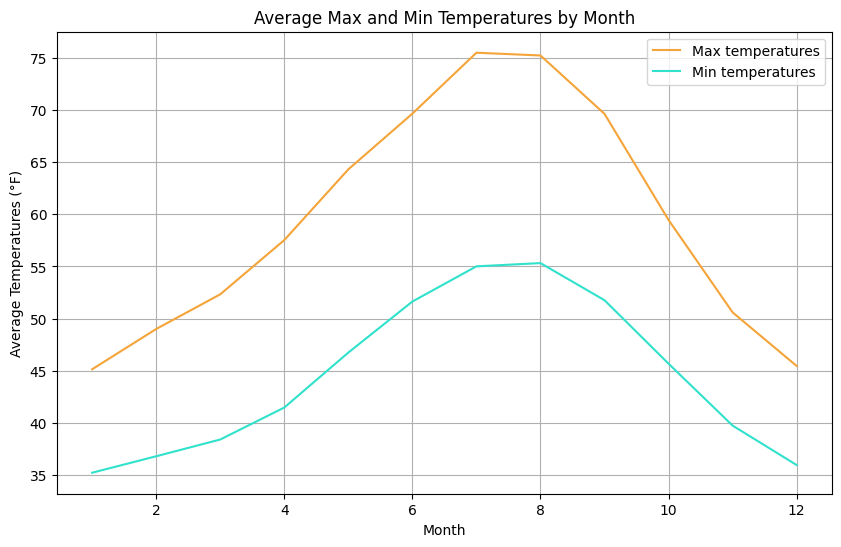

In [ ]:
# Calculate the average maximum and minimum temperatures by month
averageByMonth = data.groupby('MONTH')['TMAX', 'TMIN'].mean().reset_index()

# Create a line plot using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=averageByMonth, x='MONTH', y='TMAX', linewidth=1.5, color='#F4A438', label='Max temperatures')
sns.lineplot(data=averageByMonth, x='MONTH', y='TMIN', linewidth=1.5, color='#30E1CB', label='Min temperatures')
plt.title('Average Max and Min Temperatures by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperatures (°F)')
plt.legend()
plt.grid(True)
plt.show()

Create a scatter plot of 'TMAX' vs. 'TMIN' with respect to precipitation and temperature by Year

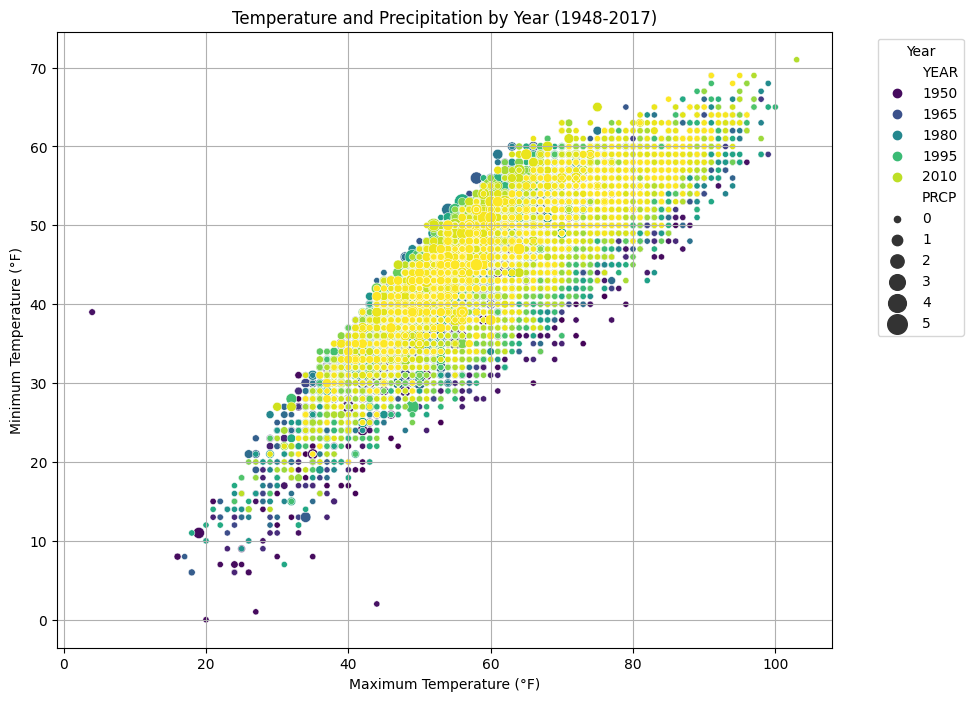

In [ ]:
# Convert 'DATE' to a datetime object
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract the year from the 'DATE' column and create a new 'YEAR' column
data['YEAR'] = data['DATE'].dt.year

# Create a scatter plot using Seaborn and Matplotlib
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='TMAX', y='TMIN', hue='YEAR', size='PRCP', sizes=(20, 200), palette='viridis')
plt.title('Temperature and Precipitation by Year (1948-2017)')
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Minimum Temperature (°F)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Average Precipitation for each Year

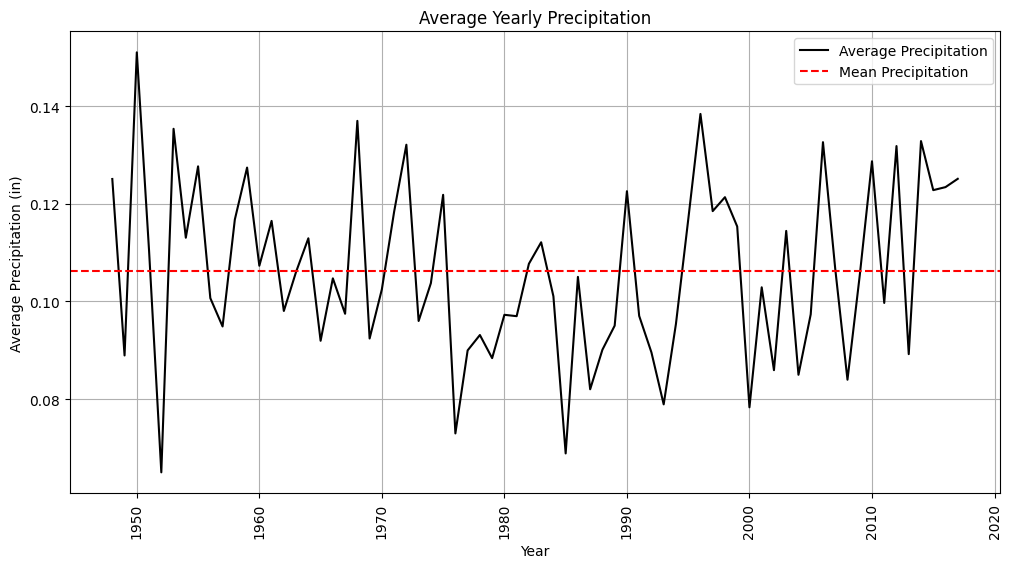

In [ ]:
# Calculate average yearly precipitation
averageByYear = data.groupby('YEAR')['PRCP'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=averageByYear, x='YEAR', y='PRCP', linewidth=1.5, color='black', label='Average Precipitation')
plt.axhline(y=averageByYear['PRCP'].mean(), linestyle='dashed', color='red', label='Mean Precipitation')
plt.title('Average Yearly Precipitation')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (in)')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

### Feature Engineering

In [ ]:
# Convert the 'DATE' column into a float data type
data['DATE'] = pd.to_datetime(data['DATE']).astype(int) / 10**9  # Convert to seconds

# Check the data type of the 'DATE' column
print(data['DATE'].dtype)

float64


### Features and Target

In [ ]:
# Separate features (predictors) and target variable
features = data[['DATE', 'PRCP', 'TMAX', 'TMIN']]

target = data['RAIN']

### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets for verification
print("Training set - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, " Target:", y_test.shape)

Training set - Features: (20438, 4)  Target: (20438,)
Testing set - Features: (5110, 4)  Target: (5110,)


### Model Training




Training a Logistic Regression Model:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Training a Decision Tree Model:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluating Model

logistic_regression_model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the logistic_regression_model
y_pred_logistic = logistic_regression_model.predict(X_test)

# Calculate MAE, MSE, and R2 Score for logistic_regression_model
mae_logistic = mean_absolute_error(y_test, y_pred_logistic)
mse_logistic = mean_squared_error(y_test, y_pred_logistic)
r2_logistic = r2_score(y_test, y_pred_logistic)

# Print the results for logistic_regression_model
print("Logistic Regression Model:")
print(f"MAE: {mae_logistic}")
print(f"MSE: {mse_logistic}")
print(f"R2 Score: {r2_logistic}")

Logistic Regression Model:
MAE: 0.07084148727984345
MSE: 0.07084148727984345
R2 Score: 0.7095871167217013


decision_tree_model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the decision_tree_model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate MAE, MSE, and R2 Score for decision_tree_model
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Print the results for decision_tree_model
print("Decision Tree Model:")
print(f"MAE: {mae_decision_tree}")
print(f"MSE: {mse_decision_tree}")
print(f"R2 Score: {r2_decision_tree}")

Decision Tree Model:
MAE: 0.0
MSE: 0.0
R2 Score: 1.0


### Prediction

In [ ]:
# Create a new data point for prediction
new_data_point = pd.DataFrame({
    'DATE': ['2023-08-30'],  # Replace with your desired date
    'PRCP': [0.2],           # Replace with your precipitation value
    'TMAX': [68],            # Replace with your maximum temperature value
    'TMIN': [50]             # Replace with your minimum temperature value
})

# Convert the 'DATE' column to a numerical format (Unix timestamp)
new_data_point['DATE'] = pd.to_datetime(new_data_point['DATE']).astype(int) / 10**9

# Make predictions using the Decision Tree Model
prediction = decision_tree_model.predict(new_data_point)

# 'prediction' now contains the predicted value for the new data point

# Print the prediction
print("Predicted RAIN:", prediction[0])

Predicted RAIN: 1
